### 总结

### 想检验样本数据是否服从正态分布，可以使用下面两大类方法：
- <b>图形方法</b>
  - 直方图
  - KDE（核密度估计）图
  - QQ Plot

- <b>统计方法</b>
  - Shapiro-Wilk Test(适合小样本，比如数千及以下)
  - D'Agostino's K^2 Test
  - Kolmogorov-Smirnov Test
  - Anderson-Darling Test (基于KS Test改良)
  
### 如果不服从正态分布，如何转换为正态分布
- Log转换: new_x = np.log(x)
  <br/>使服从对数正态分布的数据正态化。如果数据中有负数或者0值时，可以使用new_x = np.log(x+k)
- Square root转换: new_x = np.sqrt(x)
  <br/>使服从泊松分布的数据或者轻度偏态数据正态化
- Reciprocal转换: new_x = 1/x
  <br/>常用于两端波动较大的数据，可使得极端值影响减小
- Exponential转换: new_x = x**(1/a)
- Box-Cox转换: new_x = stats.boxcox(x)
  <br/>计量经济学中常用

### Prepare the data for normality tests

In [1]:
import numpy as np

In [2]:
# seed the random number generator
np.random.seed(1)
# generate sample data
data = 5 * np.random.randn(100) + 50

In [3]:
print("Mean={:.3f}, Standard Deviation:{:.3f}".format(np.mean(data), np.std(data)))

Mean=50.303, Standard Deviation:4.426


In [4]:
data

array([58.12172682, 46.94121793, 47.35914124, 44.63515689, 54.32703815,
       38.49230652, 58.72405882, 46.1939655 , 51.59519548, 48.75314812,
       57.31053969, 39.69929645, 48.38791398, 48.07972823, 55.66884721,
       44.50054366, 49.13785896, 45.61070791, 50.21106873, 52.91407607,
       44.49690411, 55.72361855, 54.5079536 , 52.51247169, 54.50427975,
       46.5813607 , 49.38554887, 45.32115283, 48.6605596 , 52.65177733,
       46.54169624, 48.01623237, 46.5641365 , 45.77397179, 46.64376935,
       49.93667701, 44.41344826, 51.17207849, 58.29901089, 53.7102208 ,
       49.04082224, 45.56185518, 46.26420853, 58.46227301, 50.25403877,
       46.81502177, 50.95457742, 60.50127568, 50.60079476, 53.08601555,
       51.5008516 , 48.23875077, 44.28740901, 48.25328639, 48.95552883,
       52.93311596, 54.19491707, 54.65551041, 51.42793663, 54.42570582,
       46.2280103 , 56.26434078, 52.5646491 , 48.50953582, 52.44259073,
       49.62214143, 55.65814694, 57.59908408, 60.92787703, 43.01

In [5]:
from scipy.stats import skew, kurtosis

### 偏度和峰度
- skewness的绝对值大于1，高度偏态
- skewness的绝对值在0.5~1之间，中度偏态
- skewness的绝对值在0~0.5之间，轻度偏态

In [6]:
print("偏度:{:.3f}".format(skew(data)))


偏度:-0.004


In [7]:
print("峰度:{:.3f}".format(kurtosis(data)))

峰度:-0.001


### 图形方法-直方图(Histgram)

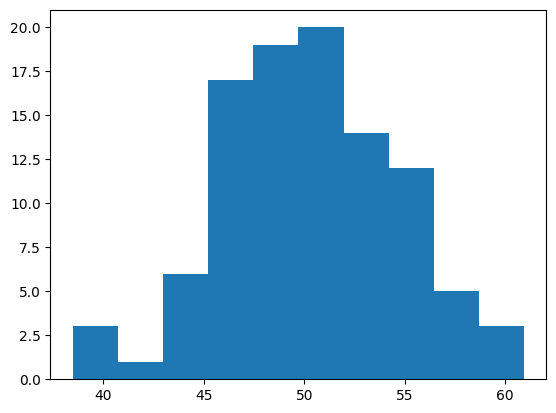

In [8]:
from matplotlib import pyplot

pyplot.hist(data)
pyplot.show()

### 图像方法-KDE图

In [9]:
import seaborn as sns

<AxesSubplot: ylabel='Density'>

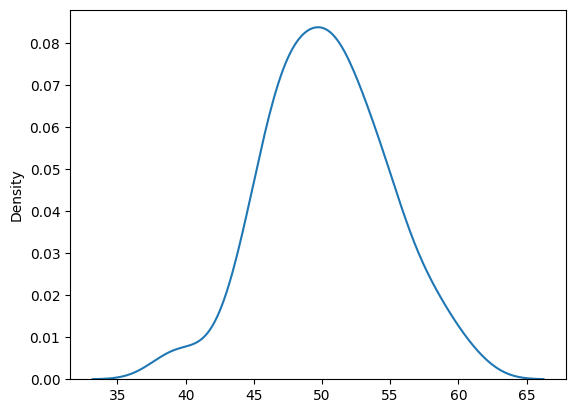

In [10]:
sns.kdeplot(data=data)

### 图像方法-Quantile-Quantile Plot(QQ Plot)

In [11]:
# QQ Plot可以用来检验样本是否服从某一个分布
# 比如我们检验样本（样本A）是否服从正态分布的时候，就从我们认为的服从的正态分布中新生成一组样本（样本B）
# 然后样本A和样本B的分位点进行对应组合，体现在QQ-Plot上就是一个点，QQ-Plot就是把不同的分位点的组合画出来
# 如果说样本真的服从这个分布，那点应该在围在45度的斜线上。点距离斜线的偏离程度就反映了样本离预期的分布有多大差距。

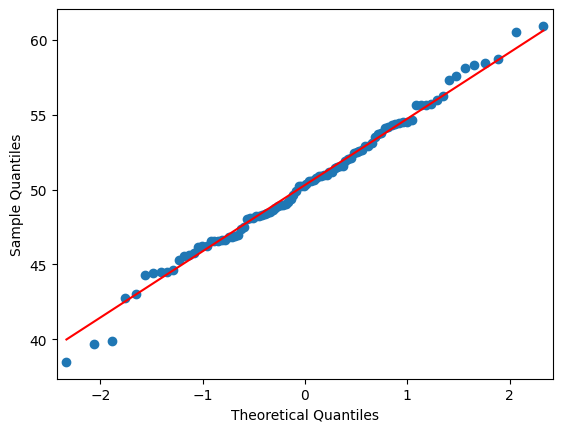

In [12]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s') # line='s'会画出红色斜线，方便比较
pyplot.show()

### Shapiro-Wilk test

In [13]:
from scipy.stats import shapiro

In [14]:
stat, p = shapiro(data)

In [15]:
print("Statistic={:.3f}, p={:.3f}".format(stat, p))

Statistic=0.992, p=0.822


In [16]:
# H0假设: 数据是正态分布
alpha = 0.05
if p < alpha:
    print("Reject H0, 证据显示数据不是正态分布.") 
else:
    print("Fail to reject H0, 暂时没有充分证据显示数据不是正态分布")

Fail to reject H0, 暂时没有充分证据显示数据不是正态分布


### D'Agostino's K^2 Test
得分值=偏态平方+峰态平方

In [17]:
from scipy.stats import normaltest

In [18]:
stat, p = normaltest(data)

In [19]:
print("Statistic={:.3f}, p={:.3f}".format(stat, p))

Statistic=0.102, p=0.950


### Kolmogorov-Smirnov Test

In [20]:
from scipy.stats import norm, kstest

In [21]:
loc, scale = norm.fit(data)
print(loc, scale)

50.30291426037849 4.4257810691579245


In [22]:
n = norm(loc=loc, scale=scale)

In [23]:
stat, p = kstest(data, cdf=n.cdf) # 如果直接使用cdf='norm',默认则是标准正态分布(均值为0，标准差为1的正态分布)

In [24]:
print("Statistic={:.3f}, p={:.3f}".format(stat, p))

Statistic=0.044, p=0.986


### Anderson-Darling Test

In [25]:
# Anderson-Darling Test 来自一个叫Kolmogorov-Smirnov Test的改良
# 这个Test不是返回一个p值，而是返回一系列的关键值，只要计算的statistic的值小于关键值，则Fail to Reject H0.

In [26]:
from scipy.stats import anderson

In [27]:
result = anderson(data) # 默认dist ='norm'

In [28]:
result

AndersonResult(statistic=0.21965088555941747, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [29]:
print("Statistic={:.3f}".format(result.statistic))

Statistic=0.220


In [30]:
p = 0 
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print("{:.3f}: {:.3f}, Fail to Reject H0".format(sl, cv))
    else:
        print("{:.3f}: {:.3f}, Reject H0".format(sl, cv))

15.000: 0.555, Fail to Reject H0
10.000: 0.632, Fail to Reject H0
5.000: 0.759, Fail to Reject H0
2.500: 0.885, Fail to Reject H0
1.000: 1.053, Fail to Reject H0
